In [23]:
precip <- read.csv("/Users/yao/Desktop/stat201b/HW/HW2/berkeleyprecip.csv", header = TRUE)
precip[precip==-99999] <- NA # Missing values
winter.precip <- precip$DEC + precip$JAN + precip$FEB
x <- winter.precip[!is.na(winter.precip)]

In [24]:
## Write a function for the negative log-likelihood

nll <- function(par, x, verbose = FALSE){
  alpha <- par[1]; beta <- par[2] # unpack
  ll <- sum(dgamma(x, alpha, beta, log = TRUE))
  if (verbose) print(c(par, -ll))
  return(-ll)
}
    
## Numerically minimize it

start <- c(alpha = 1, beta = 1) # starting values
eps <- 1e-10 # small value for lower bounds

op <- optim(par = start, fn = nll,
            lower = rep(eps, 2),
            x = x, verbose = FALSE)
mle <- op$par

Warning message in optim(par = start, fn = nll, lower = rep(eps, 2), x = x, verbose = FALSE):
“bounds can only be used with method L-BFGS-B (or Brent)”

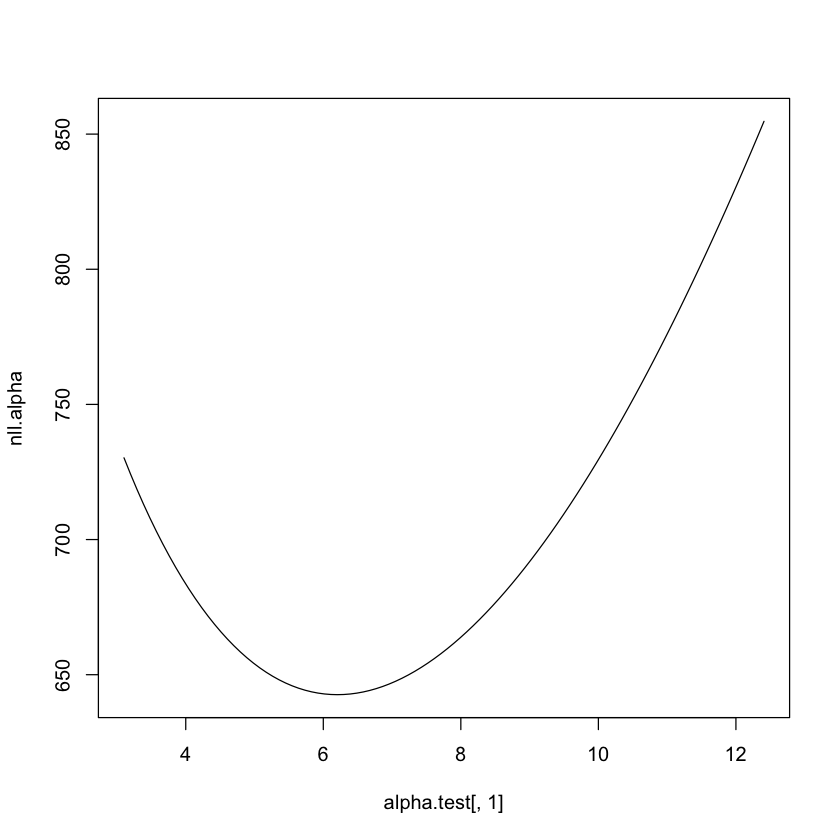

In [25]:
alpha.test <- cbind(seq(mle[1]/2, mle[1]*2, length = 100), mle[2])
nll.alpha <- apply(alpha.test, 1, nll, x = x, verbose = FALSE)
plot(alpha.test[,1], nll.alpha, type = "l")

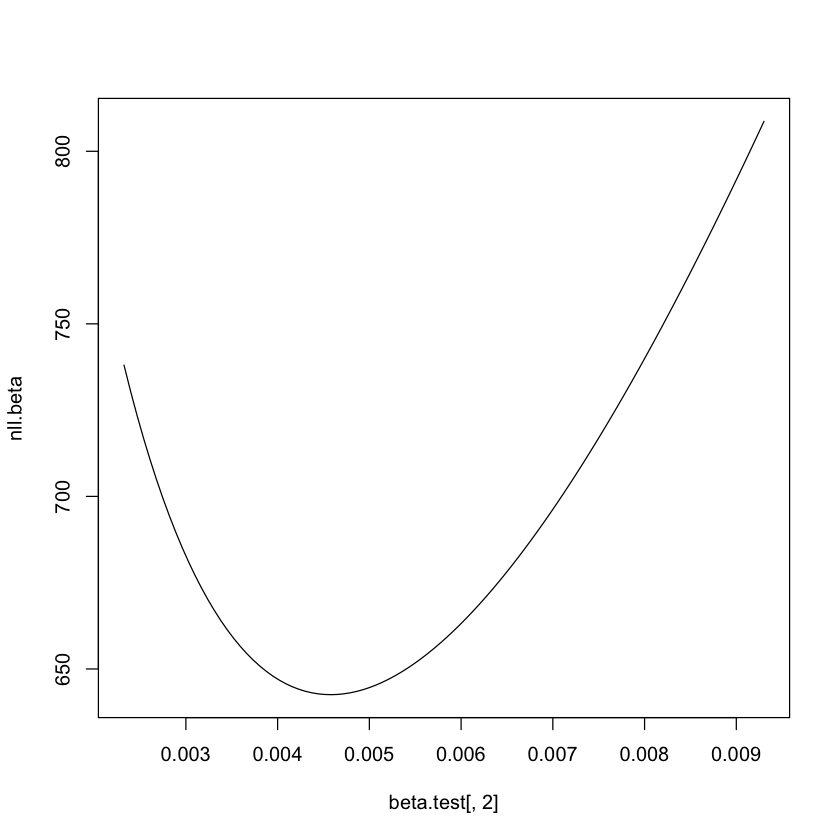

In [26]:
beta.test <- cbind(mle[1], seq(mle[2]/2, mle[2]*2, length = 100))
nll.beta <- apply(beta.test, 1, nll, x = x, verbose = FALSE)
plot(beta.test[,2], nll.beta, type = "l")

In [27]:
op <- optim(par = start, fn = nll,
            lower = rep(eps, 2), hessian = TRUE,
            x = x, verbose = FALSE)

Warning message in optim(par = start, fn = nll, lower = rep(eps, 2), hessian = TRUE, :
“bounds can only be used with method L-BFGS-B (or Brent)”

In [28]:
mle <- op$par
J <- solve(op$hessian) # no negative - already working with negative ll
se.hat <- sqrt(diag(J))

lower <- mle - 2*se.hat
upper <- mle + 2*se.hat

print("MLE:")
print(mle)
print("lower bounds:")
print(lower)
print("upper bounds:")
print(upper)
print("I try to start from very different starting alphas and betas, and either got the same mles or no convergence at all, which persuaded me that I have found a global optimum")

[1] "MLE:"
      alpha        beta 
6.204123823 0.004650913 
[1] "lower bounds:"
      alpha        beta 
4.799790126 0.003608113 
[1] "upper bounds:"
      alpha        beta 
7.608457520 0.005693713 
[1] "I try to start from very different starting alphas and betas, and either got the same mles or no convergence at all, which persuaded me that I have found a global optimum"


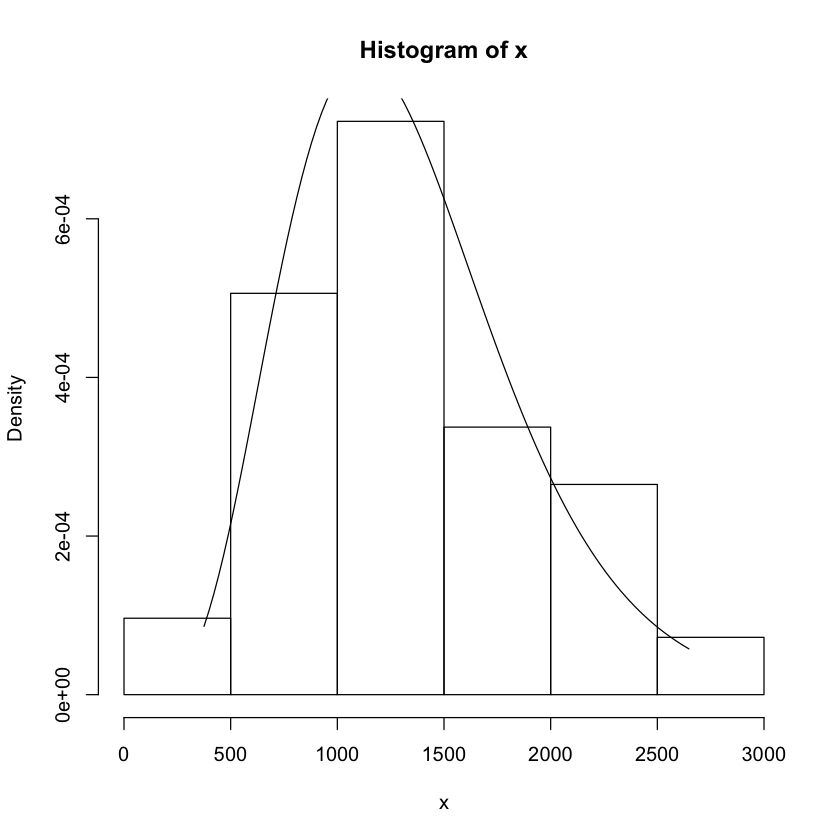

In [29]:
xseq = seq(min(x), max(x), length=100)
dseq = dgamma(xseq, mle[1], mle[2])
hist(x, freq=FALSE)
lines(xseq, dseq)